<a href="https://colab.research.google.com/github/sambhavgsharma/MLSpecializationLabs/blob/main/linear_regrex_sklearn_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
np.set_printoptions(precision=2)

In [9]:
df = pd.read_csv('drive/My Drive/houses.csv')
df.head()

,Size(sqft),Number_of_Bedrooms,Number_of_floors,Age_of_Home,Price(1000s dollars)
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


In [27]:
x_train = df.drop('Price(1000s dollars)', axis=1).values
y_train = df[['Price(1000s dollars)']].values
y_train = y_train.ravel()
X_features = ['size(sqft)','bedrooms','floors','age']

In [22]:
# Scale/Normalizing the training data
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak in Raw X:{np.ptp(x_train, axis=0)}")
print(f"Peak to Peak in Normalised X:{np.ptp(x_norm, axis=0)}")

Peak to Peak in Raw X:[5.84 6.13 2.06 3.68]
Peak to Peak in Normalised X:[5.84 6.13 2.06 3.68]


In [23]:
# Creating and Fitting the Regression model
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_train, y_train)
print(sgdr)
print(f"No. of iterations completed: {sgdr.n_iter_}, Num. of weight updates: {sgdr.t_}")

SGDRegressor()
No. of iterations completed: 132, Num. of weight updates: 13201.0


In [24]:
# Viewing Params
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w_norm}, b:{b_norm}")

model parameters: w: [110.27 -21.3  -32.47 -37.84], b:[362.24]


In [25]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(x_norm)
# make a prediction using w,b.
y_pred = np.dot(x_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[248.64 295.59 485.74 389.66]
Target values 
[271.5 300.  509.8 394. ]


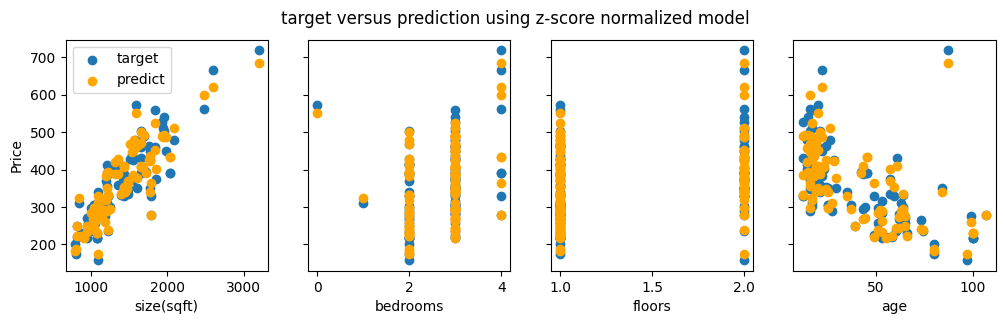

In [28]:
# Plotting Results
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(x_train[:,i],y_pred,color='orange', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()